[View in Colaboratory](https://colab.research.google.com/github/nathalyAlarconT/Lecture__NeuralNets_DL/blob/master/DeepLearning.ipynb)

# Lecture 4 - Redes Neuronales

##**Representaciones de datos para redes neuronales**

In [1]:
import numpy as np
x = np.array(12)

# Escalar - 0D tensor
print("Escalar")
print(x)
print(x.ndim) #number of axes
print(x.shape) #shape
print(x.dtype) #Data type

Escalar
12
0
()
int64


In [2]:
# Vectores - 1D tensor
x = np.array([3,4,2])
print(x)
print(x.ndim)
print(x.shape)
print(x.dtype)

[3 4 2]
1
(3,)
int64


In [3]:
# Matrix - 2D tensor
x = np.array([[2,5,2,5], [5,4,2,3],[6,23,4,566]])
print(x)
print(x.ndim)
print(x.shape)
print(x.dtype)


[[  2   5   2   5]
 [  5   4   2   3]
 [  6  23   4 566]]
2
(3, 4)
int64


In [4]:
# 3D tensor
x = np.array([
              [[2,5,2,5], [5,4,2,3],[6,2,4,566]],
              [[2,5,2,5], [5,4,2,3],[6,23,4,566]],
              [[2,4,2,5], [5,4,2,1],[2,3,4,5]]
    ])
print(x)
print(x.ndim)
print(x.shape)

[[[  2   5   2   5]
  [  5   4   2   3]
  [  6   2   4 566]]

 [[  2   5   2   5]
  [  5   4   2   3]
  [  6  23   4 566]]

 [[  2   4   2   5]
  [  5   4   2   1]
  [  2   3   4   5]]]
3
(3, 3, 4)


###Ejemplos de Tensores del mundo Real



*   Vectores - 2D Tensors (samples, features)
*   Timeseries - 3D Tensors (samples, timesteps, features) - Time axis is always the second one.
*   Imagenes - 4D Tensors (samples, height, width, channels) or (samples, channels, height, width)
*   Video - 5D Tensors (samples, frames, height, width, channels) or (samples, frames, channels, height, width)



##**Hello World en Redes Neuronales**

In [5]:
from keras.datasets import mnist

Using TensorFlow backend.


In [6]:
# Cargamos el dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11501568/11490434 [==============================] - 1s 0us/step


In [7]:
# Revisemos los tensores en train
print(train_images.ndim)
print(train_images.shape)
print(len(train_labels))
print(train_labels.dtype)


3
(60000, 28, 28)
60000
uint8


In [8]:
# Revisemos los tensores en test
print(test_images.ndim)
print(test_images.shape)
print(len(test_labels))
print(test_images.dtype)

3
(10000, 28, 28)
10000
uint8


In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**Veamos los ejemplos del dataset**

In [0]:
import matplotlib.pyplot as plt

In [0]:
image_number = 22

In [12]:
train_labels[image_number]

9

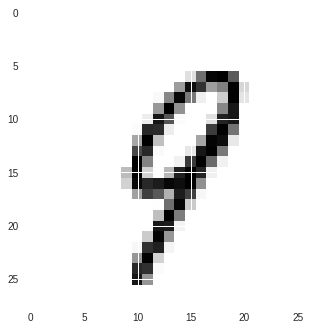

In [13]:
# Tensor Slicing = Seleccionar elementos específicos sobre el axis

digit = train_images[image_number]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

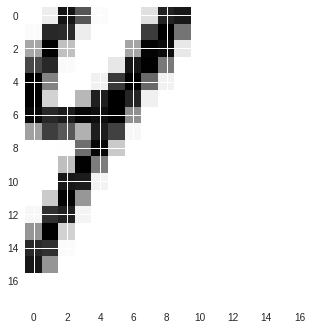

In [14]:
# Tensor Slicing = Seleccionar elementos específicos sobre el axis

digit = train_images[image_number, 10: , 10:]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

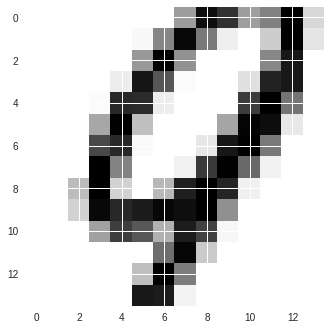

In [15]:
# Tensor Slicing = Seleccionar elementos específicos sobre el axis

digit = train_images[image_number, 7:-7 , 7:-7]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**Data Batches**

In [16]:
# Deep Learning no procesa todos los datos de golpe
# Mas bien, se dividen los datos en trozos o batches
# Las divisiones se realizan sobre el primer axis (ndim)

batch = train_images[:128]
print(batch.shape)

(128, 28, 28)


In [0]:
# El siguiente batch
batch = train_images[128:256]

In [18]:
# Batch N
n = 5
batch_size = 128
batch = train_images[batch_size * n: batch_size * (n + 1)]
print(batch.shape)

(128, 28, 28)


###**Arquitectura inicial de Red Neuronal**

In [0]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


Vamos a compilar el modelo

 A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.  Nos permite medir los errore generados

 An optimizer—The mechanism through which the network will update itself based on the data it sees and its loss function.

 Metrics to monitor during training and testing—Here, we’ll only care about accu- racy (the fraction of the images that were correctly classified).

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [0]:
from keras.utils import to_categorical
test_labels_bk = test_labels.copy()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [23]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2563 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.1052 - acc: 0.9684
Epoch 3/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.0690 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.0503 - acc: 0.9849
Epoch 5/5
 6912/60000 [==>...........................] - ETA: 4s - loss: 0.0369 - acc: 0.9893

60000/60000 [==============================] - 5s 89us/step - loss: 0.0373 - acc: 0.9890


Two quantities are displayed during training: the loss of the network over the training data, and the accuracy of the network over the training data

In [24]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 61us/step
('test_acc:', 0.9789)


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score
predictions = network.predict_classes(test_images)
pred_probs = network.predict_proba(test_images)


print("\nMatriz de confusion")
print(confusion_matrix(test_labels_bk, predictions, labels=range(0,10)))
print("\nAccuracy Score")
print(accuracy_score(test_labels_bk, predictions))


Matriz de confusion
[[ 962    0    1    2    1    1    3    3    4    3]
 [   0 1124    2    1    0    1    2    2    3    0]
 [   0    4  991    3    1    0    2   15   14    2]
 [   0    0    1  994    0    3    0    6    2    4]
 [   1    0    3    1  962    0    3    2    1    9]
 [   2    0    0    8    2  862    5    2    7    4]
 [   1    3    0    2    6    4  939    0    3    0]
 [   0    0    4    3    1    0    0 1017    2    1]
 [   0    0    2    5    3    1    1    5  952    5]
 [   0    2    0    4    8    1    0    7    1  986]]

Accuracy Score
0.9789
